In [ ]:
import sympy as sp

In [ ]:
phi11, phi12, lmbda = sp.symbols("phi11 phi12 lmbda")

eqs = [
    sp.Eq(phi11 * (8 - 2 * lmbda) + 4 * phi12, 0),
    sp.Eq(phi12 * (2 - 2 * lmbda) + 4 * phi11, 0),
    sp.Eq(phi11**2 + phi12**2, 1),  # same as initial constraint
]
sol = sp.solve(eqs, (phi11, phi12, lmbda), dict=True)
print(*sol, sep="\n")

{lmbda: 0, phi11: -sqrt(5)/5, phi12: 2*sqrt(5)/5}
{lmbda: 0, phi11: sqrt(5)/5, phi12: -2*sqrt(5)/5}
{lmbda: 5, phi11: -2*sqrt(5)/5, phi12: -sqrt(5)/5}
{lmbda: 5, phi11: 2*sqrt(5)/5, phi12: sqrt(5)/5}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
solutions = [
    {
        "lmbda": float(s[lmbda].evalf()),
        "phi": np.array([float(s[phi11].evalf()), float(s[phi12].evalf())]),
    }
    for s in sol
]

print(solutions)

[{'lmbda': 0.0, 'phi': array([-0.4472136 ,  0.89442719])}, {'lmbda': 0.0, 'phi': array([ 0.4472136 , -0.89442719])}, {'lmbda': 5.0, 'phi': array([-0.89442719, -0.4472136 ])}, {'lmbda': 5.0, 'phi': array([0.89442719, 0.4472136 ])}]


<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/tq/w_yq51q901g31lqy10hn7b000000gn/T/ipykernel_60671/2524181734.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.plot([0, phi[0]], [0, phi[1]], label=f'$\lambda$={lmbda}', color=color, lw=1)


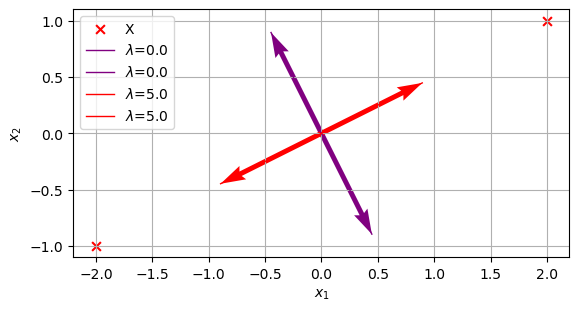

In [ ]:
X = np.array([[2, 1], [-2, -1]])

plt.scatter(X[:, 0], X[:, 1], c="red", s=40, label="X", marker="x")

for s in solutions:
    lmbda = s["lmbda"]
    phi = s["phi"]
    color = "red" if lmbda > 0 else "purple"
    plt.plot([0, phi[0]], [0, phi[1]], label=f"$\lambda$={lmbda}", color=color, lw=1)
    plt.quiver(
        0,
        0,  # origin
        phi[0],  # dx
        phi[1],  # dy
        angles="xy",
        scale_units="xy",
        scale=1,
        color=color,
        width=0.01,
    )


plt.grid(True)
plt.gca().set_aspect("equal")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

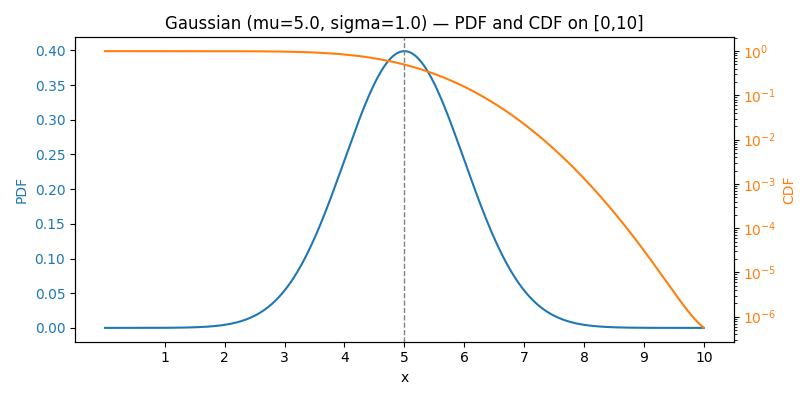

In [8]:
# PLOT A gaussian distribution, mean = 5, std = 1, plot cdf and pdf
# from 0 to 10
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt


mu, sigma = 5.0, 1.0
x = np.linspace(0, 10, 1000)
pdf = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

dx = x[1] - x[0]
cdf = 1 - np.cumsum(pdf) * dx  # numeric integration of pdf -> cdf

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(x, pdf, color="tab:blue", label="PDF")
ax1.set_ylabel("PDF", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(x, cdf, color="tab:orange", label="CDF")
ax2.set_ylabel("CDF", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

ax1.axvline(mu, color="gray", linestyle="--", lw=1)
ax1.set_xlabel("x")
ax1.set_title(f"Gaussian (mu={mu}, sigma={sigma}) — PDF and CDF on [0,10]")
fig.tight_layout()
plt.xticks(range(1, 11, 1))
ax2.set_yscale("log")
plt.show()